In [14]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.drop(['sepal length (cm)','sepal width (cm)'],axis = 1 , inplace = True)

In [10]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   petal length (cm)  150 non-null    float64
 1   petal width (cm)   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [12]:
plt.scatter(df['petal length (cm)',df['petal width (cm)']])

InvalidIndexError: ('petal length (cm)', 0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 150, dtype: float64)

In [15]:
scaler = MinMaxScaler()
df['petal length (cm)'] = scaler.fit_transform(df[['petal length (cm)']])

df['petal width (cm)'] = scaler.fit_transform(df[['petal width (cm)']])

df

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


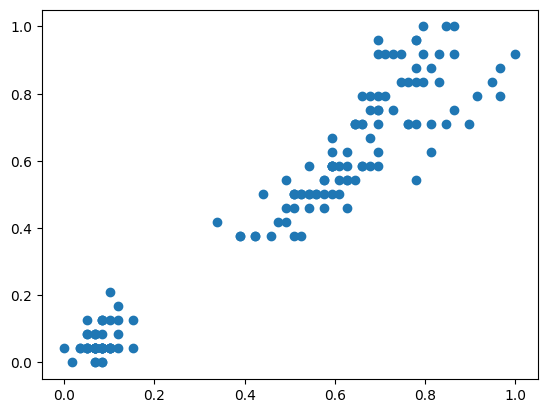

In [17]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [21]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

In [22]:
sse

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1615234094205573,
 0.8616150173815893,
 0.7294510694346216,
 0.6163602453129818,
 0.4948034686961246,
 0.41394074653734225]

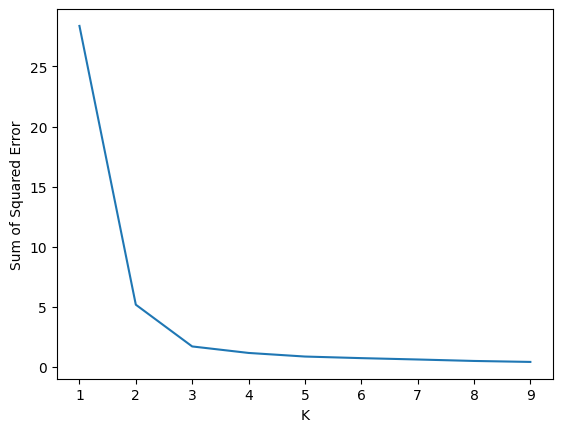

In [23]:
plt.xlabel("K")
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse)

In [48]:
km = KMeans(n_clusters = 3,init='random',algorithm='elkan')
y_pred = km.fit_predict(df[['petal length (cm)','petal width (cm)']])


In [49]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [50]:
df['cluster'] = y_pred
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [51]:
km.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.55867014, 0.51041667],
       [0.7740113 , 0.81510417]])

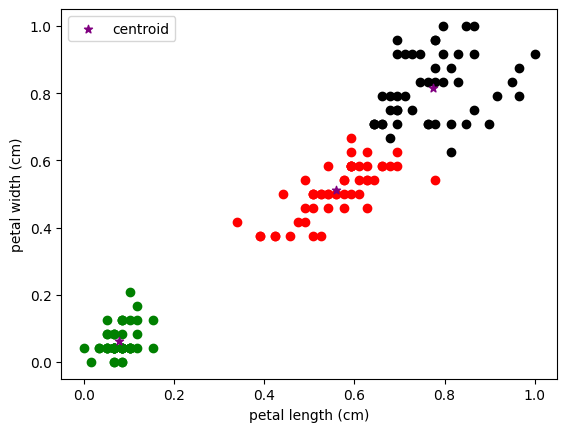

In [52]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color = 'black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple', marker ='*',label = 'centroid')

plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()

In [53]:
len(df1)

50

In [54]:
len(df2)

52

In [55]:
len(df3)

48